# Exploratory Data Analysis

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [2]:
file = open("data_clean.pkl", "rb")
data = pickle.load(file)
data

,transcript
AlonsoPraisesAMR,fernando alonso was delighted with his drive t...
HamiltonsCarIssues,lewis hamilton was left to rue the struggles h...
LeclercsPoorQualifying,charles leclerc enjoyed a strong drive to in ...
PerezOnHisFuture,sergio perez expects his red bull and future ...
SainzOnHisFuture,carlos sainz feels that now is the time to spe...
TotoOnMercedes,toto wolff has admitted that mercedes are in a...
TsunodaPoints,yuki tsunoda was full of relief after scoring ...


In [3]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data.index

data=data_dtm.transpose()

In [4]:
data.head(50)

,AlonsoPraisesAMR,HamiltonsCarIssues,LeclercsPoorQualifying,PerezOnHisFuture,SainzOnHisFuture,TotoOnMercedes,TsunodaPoints
able,0,1,0,0,0,0,1
abu,0,0,0,0,0,0,1
according,0,0,0,1,0,0,0
achilles,0,0,0,1,0,0,0
acknowledged,1,1,0,0,0,1,0
action,1,0,0,0,0,0,1
added,1,1,0,0,0,1,0
admits,0,0,0,0,0,1,0
admitted,0,0,1,1,0,1,0
advantage,0,0,1,0,0,0,0


#### Find  and print the top 30 words said by each comedian


In [5]:
top30_dict={}
for i in data.columns:
    top = data[i].sort_values(ascending=False).head(30)
    top30_dict[i]=list(zip(top.index,top.values))
top30_dict

{'AlonsoPraisesAMR': [('alonso', 8),
  ('race', 6),
  ('pace', 6),
  ('stroll', 5),
  ('need', 5),
  ('team', 4),
  ('weekend', 4),
  ('japan', 4),
  ('turn', 3),
  ('track', 3),
  ('available', 3),
  ('tough', 3),
  ('currently', 3),
  ('early', 3),
  ('prix', 3),
  ('japanese', 3),
  ('following', 3),
  ('red', 3),
  ('grand', 3),
  ('fastest', 2),
  ('functional', 2),
  ('consent', 2),
  ('piastri', 2),
  ('flag', 2),
  ('think', 2),
  ('happy', 2),
  ('good', 2),
  ('lot', 2),
  ('sundays', 2),
  ('car', 2)],
 'HamiltonsCarIssues': [('russell', 8),
  ('car', 6),
  ('hamilton', 6),
  ('race', 6),
  ('like', 4),
  ('know', 4),
  ('suzuka', 4),
  ('better', 4),
  ('let', 4),
  ('mercedes', 4),
  ('read', 3),
  ('red', 3),
  ('tracks', 3),
  ('hoped', 3),
  ('think', 3),
  ('circuits', 3),
  ('japanese', 3),
  ('season', 3),
  ('good', 3),
  ('team', 3),
  ('george', 3),
  ('early', 3),
  ('currently', 3),
  ('need', 3),
  ('provide', 2),
  ('probably', 2),
  ('consent', 2),
  ('highsp

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [6]:
from collections import Counter
w=[]
for i in data.columns:
    top = [word for (word,count) in top30_dict[i]]
    for t in top:
        w.append(t)
w

['alonso',
 'race',
 'pace',
 'stroll',
 'need',
 'team',
 'weekend',
 'japan',
 'turn',
 'track',
 'available',
 'tough',
 'currently',
 'early',
 'prix',
 'japanese',
 'following',
 'red',
 'grand',
 'fastest',
 'functional',
 'consent',
 'piastri',
 'flag',
 'think',
 'happy',
 'good',
 'lot',
 'sundays',
 'car',
 'russell',
 'car',
 'hamilton',
 'race',
 'like',
 'know',
 'suzuka',
 'better',
 'let',
 'mercedes',
 'read',
 'red',
 'tracks',
 'hoped',
 'think',
 'circuits',
 'japanese',
 'season',
 'good',
 'team',
 'george',
 'early',
 'currently',
 'need',
 'provide',
 'probably',
 'consent',
 'highspeed',
 'verstappen',
 'feature',
 'leclerc',
 'really',
 'race',
 'qualifying',
 'good',
 'day',
 'focus',
 'today',
 'im',
 'sainz',
 'driver',
 'lap',
 'issues',
 'races',
 'place',
 'normally',
 'grand',
 'prix',
 'bit',
 'just',
 'voted',
 'suzuka',
 'drive',
 'tyres',
 'hoping',
 'started',
 'starting',
 'podium',
 'yesterday',
 'time',
 'red',
 'bull',
 'perez',
 'year',
 'futur

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [7]:
Counter(w).most_common()

[('race', 7),
 ('team', 5),
 ('prix', 5),
 ('need', 4),
 ('japan', 4),
 ('japanese', 4),
 ('grand', 4),
 ('think', 4),
 ('time', 4),
 ('currently', 3),
 ('early', 3),
 ('red', 3),
 ('consent', 3),
 ('good', 3),
 ('car', 3),
 ('suzuka', 3),
 ('read', 3),
 ('sainz', 3),
 ('weekend', 2),
 ('track', 2),
 ('available', 2),
 ('functional', 2),
 ('russell', 2),
 ('hamilton', 2),
 ('like', 2),
 ('better', 2),
 ('mercedes', 2),
 ('season', 2),
 ('provide', 2),
 ('verstappen', 2),
 ('feature', 2),
 ('driver', 2),
 ('races', 2),
 ('bit', 2),
 ('started', 2),
 ('year', 2),
 ('future', 2),
 ('far', 2),
 ('rb', 2),
 ('challenging', 2),
 ('point', 2),
 ('alonso', 1),
 ('pace', 1),
 ('stroll', 1),
 ('turn', 1),
 ('tough', 1),
 ('following', 1),
 ('fastest', 1),
 ('piastri', 1),
 ('flag', 1),
 ('happy', 1),
 ('lot', 1),
 ('sundays', 1),
 ('know', 1),
 ('let', 1),
 ('tracks', 1),
 ('hoped', 1),
 ('circuits', 1),
 ('george', 1),
 ('probably', 1),
 ('highspeed', 1),
 ('leclerc', 1),
 ('really', 1),
 ('qua

#### If more than half of the comedians have it as a top word, exclude it from the list


In [8]:
new_stop_words = [ word for word , count in Counter(w).most_common() if count>6]
new_stop_words

['race']

In [9]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean=pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words=list(text.ENGLISH_STOP_WORDS.union(new_stop_words))
stop_words
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_new = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_new.index = data_clean.index
# Pickle it for later use
pickle.dump(cv,open('cv_stop.pkl',"wb"))
data_new.to_pickle("dtm_stop.pkl")

In [10]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
wc=WordCloud(stopwords=stop_words, background_color="white")

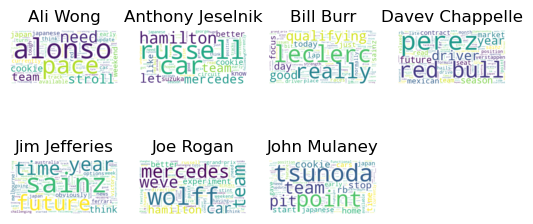

In [11]:
# Reset the output dimensions
import matplotlib.pyplot as plt

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Davev Chappelle','Jim Jefferies','Joe Rogan','John Mulaney','Matt Rife','Mike Birbiglia','Ricky Gervais','Shane Gillis','Stavros Halkias']

# Create subplots for each comedian
for index,com in enumerate(data.columns):
    wc.generate(data_clean.transcript[com])

    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_names[index])

#### You observations
1. John  Mulaney refers to Clinton alot in his set.
2. Mike talks of someone named Jenny. 
3. Most of the comidians swear alot.

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [13]:
data

,ali,anthony,bill,dave,jim,joe,john,matt,mike,ricky,shane,stavros
aaaaah,0,0,1,0,0,0,0,0,0,0,0,1
aaah,0,0,0,1,0,0,0,0,0,0,0,0
abc,1,0,0,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,1,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,1,1,0


In [14]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_words=[]
for i in data.columns:
    unique = data[i][data[i]!=0].size
    unique_words.append(unique)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names,unique_words)), columns=['Comedian', 'Unique Words'])
data_unique_sorted=data_words.sort_values(by='Unique Words')
data_unique_sorted

,Comedian,Unique Words
1,Anthony Jeselnik,1004
10,Shane Gillis,1086
4,Jim Jefferies,1321
0,Ali Wong,1356
11,Stavros Halkias,1413
3,Davev Chappelle,1415
6,John Mulaney,1421
7,Matt Rife,1457
5,Joe Rogan,1465
8,Mike Birbiglia,1513


In [15]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list=[]
for com in data.columns:
    totals = sum(data[com])
    total_list.append(totals)

# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'
run_times = [60,59,80,60,67,73,77,63,62,58,76,79]
# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_words['total_words']=total_list
data_words['run_times']=run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,Comedian,Unique Words,total_words,run_times,words_per_minute
10,Shane Gillis,1086,3072,76,40.421053
1,Anthony Jeselnik,1004,2912,59,49.355932
11,Stavros Halkias,1413,4106,79,51.974684
6,John Mulaney,1421,4020,77,52.207792
0,Ali Wong,1356,3281,60,54.683333
5,Joe Rogan,1465,4584,73,62.794521
3,Davev Chappelle,1415,4067,60,67.783333
2,Bill Burr,1633,5535,80,69.187500
7,Matt Rife,1457,4360,63,69.206349
4,Jim Jefferies,1321,4764,67,71.104478


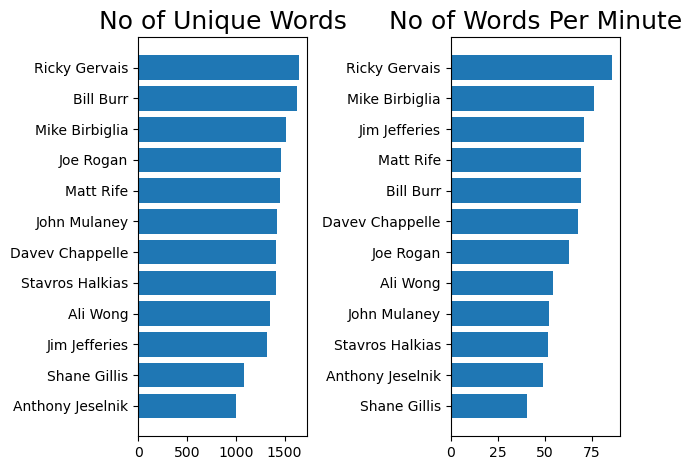

In [16]:
# plot our findings
#import numpy as np
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sorted["Unique Words"], align='center')
plt.yticks(y_pos, data_unique_sorted.Comedian)
plt.title('No of Unique Words', fontsize=18)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.Comedian)
plt.title('No of Words Per Minute', fontsize=18)

plt.tight_layout()
plt.show()

#### Write your findings.
* **Vocabulary**
   * Ricky Gervais and Bill Burr use a lot of words in their comedy
   * Shane Gillis and Anthony Jeselnik have a smaller vocabulary


* **Talking Speed**
   * Ricky and Mike talk fast
   * Shane Gillis and Anthony Jeselnik talk slow
   
Davev Chappelle is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [17]:
# take a look at the most common words.
Counter(w).most_common()

[('like', 12),
 ('im', 12),
 ('just', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('youre', 11),
 ('got', 11),
 ('people', 10),
 ('gonna', 9),
 ('think', 9),
 ('oh', 8),
 ('time', 8),
 ('yeah', 8),
 ('hes', 7),
 ('going', 7),
 ('day', 6),
 ('really', 6),
 ('said', 6),
 ('say', 6),
 ('good', 6),
 ('theyre', 6),
 ('shit', 5),
 ('cause', 5),
 ('fucking', 5),
 ('want', 5),
 ('theres', 5),
 ('dude', 4),
 ('guys', 4),
 ('thing', 4),
 ('did', 4),
 ('fuck', 4),
 ('didnt', 4),
 ('little', 4),
 ('lot', 3),
 ('ive', 3),
 ('guy', 3),
 ('man', 3),
 ('went', 3),
 ('fcking', 3),
 ('fck', 3),
 ('gotta', 2),
 ('women', 2),
 ('god', 2),
 ('tell', 2),
 ('joke', 2),
 ('okay', 2),
 ('make', 2),
 ('come', 2),
 ('goes', 2),
 ('white', 2),
 ('real', 2),
 ('way', 2),
 ('dad', 2),
 ('id', 2),
 ('mean', 2),
 ('doing', 2),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('need', 1),
 ('pregnant', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('baby', 1),
 ('let', 1),
 

In [18]:
# isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
dave,65,45
jim,115,20
joe,0,38
john,4,6
matt,73,25
mike,0,0
ricky,60,6


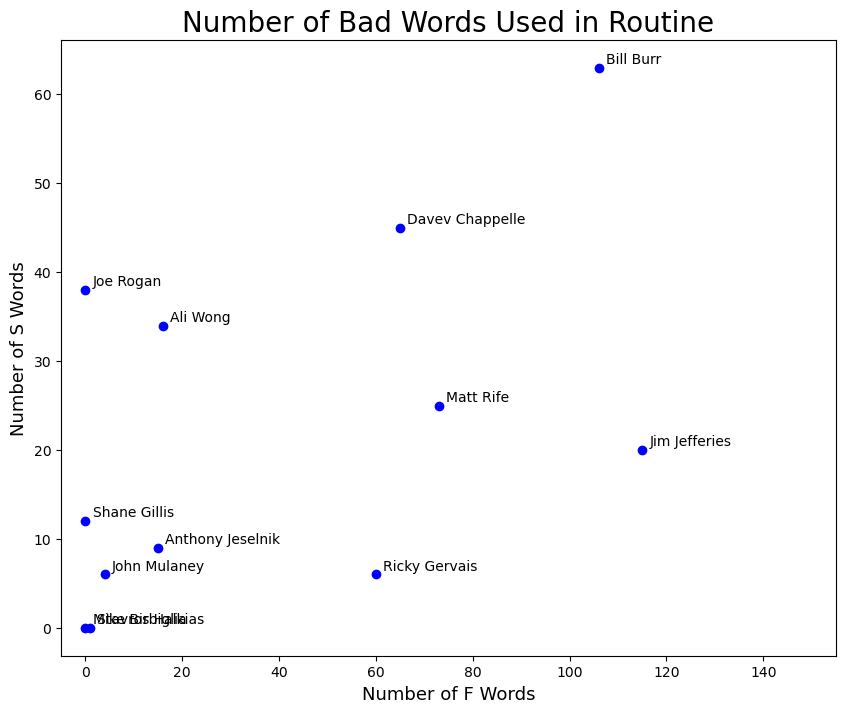

In [19]:
# create a scatter plot of your findings

plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Words', fontsize=13)
plt.ylabel('Number of S Words', fontsize=13)

plt.show()


### Write your findings. 
-Bill Burn and Jim Jefferies use a lot of profanity in their comedy.<br>
-Mike and Shane do clean comedy i.e. with out any profanity.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [20]:
file = open("corpus.pkl", "rb")
data = pickle.load(file)
data1 = data.transcript
pattern= r'\[([^\[\]]+)\]'
data1 = data1.str.findall(pattern).apply(', '.join)
print(data)
data1


                                                transcript         full_name
ali      \n \nLadies and gentlemen, please welcome to t...          Ali Wong
anthony  \n \nThank you. Thank you. Thank you, San Fran...  Anthony Jeselnik
bill     \n \n[cheers and applause] All right, thank yo...         Bill Burr
dave     \n \nThis is Dave. He tells dirty jokes for a ...        Bo Burnham
jim      \n \n[Car horn honks] [Audience cheering] [Ann...    Dave Chappelle
joe      \n \n[rock music playing]\n[audience cheering]...      Hasan Minhaj
john     \n \nArmed with boyish charm and a sharp wit, ...     Jim Jefferies
matt     \n \nIn his second hour-long comedy special, “...         Joe Rogan
mike     \n \nWow. Hey, thank you. Thanks. Thank you, g...      John Mulaney
ricky    \n \nHello. Hello! How you doing? Great. Thank...        Louis C.K.
shane    \n \nShane Gillis’ debut stand-up comedy speci...    Mike Birbiglia
stavros  \n \nIn his stand-up comedy special Live at th...     Ricky Gervais

ali                                                         
anthony                                                     
bill       cheers and applause, cheering and applause, ch...
dave                                                        
jim        Car horn honks, Audience cheering, Announcer, ...
joe        rock music playing, audience cheering, announc...
john                                                        
matt       Music, Applause, Applause, Applause, Applause,...
mike                                                        
ricky                                                       
shane      Laughter, Applause, Laughter, Laughter, Laught...
stavros                  announcer, buzzer sound, spit sound
Name: transcript, dtype: object

In [21]:
cv = CountVectorizer()
data_cv1 = cv.fit_transform(data1)
data_dtm1 = pd.DataFrame(data_cv1.toarray(), columns=cv.get_feature_names_out())
data_dtm1.index = data1.index

data_df=data_dtm1.transpose()
data_df.head(60)

,ali,anthony,bill,dave,jim,joe,john,matt,mike,ricky,shane,stavros
__,0,0,0,0,0,0,0,1,0,0,0,0
accent,0,0,0,0,11,1,0,0,0,0,0,0
african,0,0,0,0,5,0,0,0,0,0,0,0
agonized,0,0,1,0,0,0,0,0,0,0,0,0
american,0,0,0,0,6,0,0,0,0,0,0,0
and,0,0,10,0,0,5,0,0,0,0,0,0
angrily,0,0,1,0,0,0,0,0,0,0,0,0
announcer,0,0,0,0,1,1,0,0,0,0,0,1
applauding,0,0,0,0,2,5,0,0,0,0,0,0
applause,0,0,12,0,2,0,0,31,0,0,6,0


In [22]:
data_response = data_df.transpose()[['applauding', 'applause', 'cheering','chuckles','chuckling','laughing','laughs','laughter']]
data_audience=data_response.sum(axis=1)
data_audience

ali         0
anthony     0
bill       15
dave        0
jim        38
joe        22
john        0
matt       33
mike        0
ricky       0
shane      25
stavros     0
dtype: int64

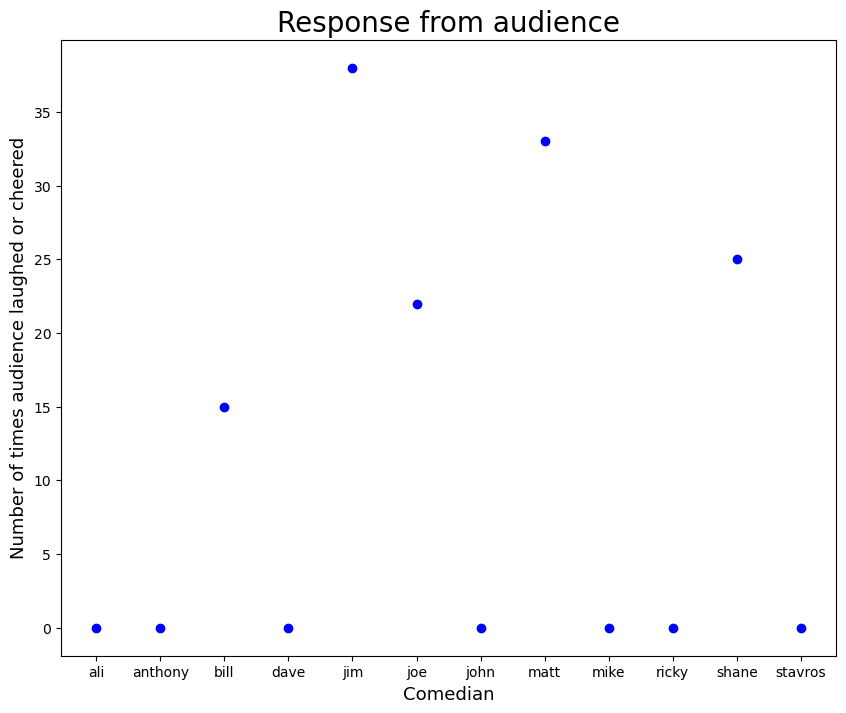

In [23]:
for i in enumerate(data_audience.index):
    x = i[1]
    y = data_audience[i[1]]
    plt.scatter(x, y, color='blue')
      
plt.title('Response from audience', fontsize=20)
plt.xlabel('Comedian', fontsize=13)
plt.ylabel('Number of times audience laughed or cheered', fontsize=13)

plt.show()